# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable


## Introduction


The challenge that we have worked on is Churn Prediction

We have performed some EDA to get an understanding of the different categories of people in the data and we have also built a prediction model based on Linear Regression to predict the reduction ratio. Higher the reduction ratio, more is the churn. 

Our additional source of data is the latitude and longitude data of the counties and cities in Portugal to create an Origin Destination map in Tableau.

## Development
Start coding here! 🐱‍🏍

Don't hesitate to create markdown cells to include descriptions of your work where you see fit, as well as commenting your code.

We know that you know exactly where to start when it comes to crunching data and building models, but don't forget that WDL is all about social impact...so take that into consideration as well.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Import Data

In [ ]:
churn_od = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/pse/Churn_OD.txt',delimiter = '|', encoding = 'Latin-1')
print(len(churn_od))
churn_od.head()

2253


,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.069997
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.066059
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.059847
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.052341


In [ ]:
churn_od.to_csv('churd_od.csv')

In [ ]:
churn_up = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/pse/Churn_UsersProfile.txt',delimiter = '|', encoding = 'Latin-1')
print(len(churn_up))
churn_up.head()

544


,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092


In [ ]:
churn_up.to_csv('churn_up.csv')

In [ ]:
churn_up.describe()

,Average_BusUsers_per_Day
count,544.000000
mean,1165.396638
std,3842.867736
min,5.514983
25%,158.801133
50%,475.677330
75%,990.064295
max,66882.208463


In [ ]:
# We are seeing some counties having very high bus uses
churn_up[churn_up['Average_BusUsers_per_Day']>10000]
# All are in Porto, and all are 65+ age groups

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,pre_post
184,R2 - AM Porto,Porto,Gondomar,Sep-19 to Feb-20,Female,65+,66882.208463,pre
201,R2 - AM Porto,Porto,Maia,Sep-19 to Feb-20,Male,65+,38731.005027,pre
218,R2 - AM Porto,Porto,Porto,Sep-19 to Feb-20,Female,65+,11774.918453,pre
224,R2 - AM Porto,Porto,Porto,Sep-19 to Feb-20,Male,65+,13509.241837,pre
456,R2 - AM Porto,Porto,Gondomar,Sep-20 to Jan-21,Female,65+,34406.417961,post


Plotting

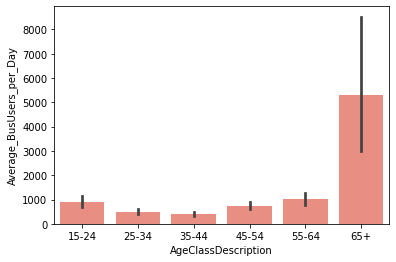

In [ ]:
sns.barplot(x="AgeClassDescription",y="Average_BusUsers_per_Day",data = churn_up,color='salmon')

In [ ]:
# As we can see, most of the users of public transportation come from 65+ age group
# College going (15-24) is a bump in lower age groups, but lesser than expected from population data
# Maybe because most of them live in hostels, and/or use cycling

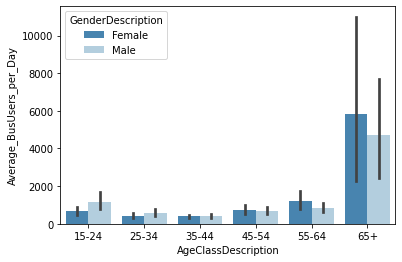

In [ ]:
sns.barplot(x="AgeClassDescription",y="Average_BusUsers_per_Day",data = churn_up,hue="GenderDescription",palette='Blues_r')

In [ ]:
# Gender ratio is more or less same across age groups, for using public transportation
# More females in 65+ age group, might be correlated to higher life expantency of women compared to men

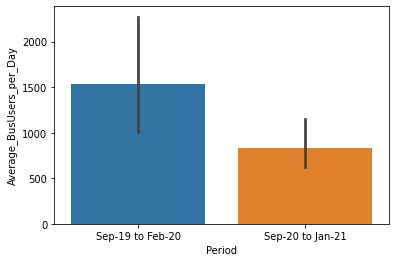

In [ ]:
sns.barplot(x="Period",y="Average_BusUsers_per_Day",data = churn_up)

In [ ]:
# We haver overall less volume in post-pandemic period, than pre.
# That can be because of 2nd waves in Portugal, in November 2020 and in January 2021
# So this might introduce an overall bias in post vs pre comparison

In [ ]:
churn_up["County_of_Origin"].unique()

array(['Amadora', 'Cascais', 'Lisboa', 'Loures', 'Mafra', 'Odivelas',
       'Oeiras', 'Sintra', 'Vila Franca de Xira', 'Alcochete', 'Almada',
       'Barreiro', 'Moita', 'Montijo', 'Palmela', 'Seixal', 'Sesimbra',
       'Setúbal', 'Espinho', 'Oliveira de Azeméis',
       'Santa Maria da Feira', 'Gondomar', 'Maia', 'Matosinhos',
       'Paredes', 'Porto', 'Póvoa de Varzim', 'Santo Tirso', 'Trofa',
       'Valongo', 'Vila do Conde', 'Vila Nova de Gaia', 'Arouca',
       'São João da Madeira', 'Vale de Cambra'], dtype=object)

In [ ]:
churn_up["Region_of_Origin"].unique()

array(['R1 - AM Lisboa', 'R2 - AM Porto'], dtype=object)

In [ ]:
churn_up["District_of_Origin"].unique()

array(['Lisboa', 'Setúbal', 'Aveiro', 'Porto'], dtype=object)

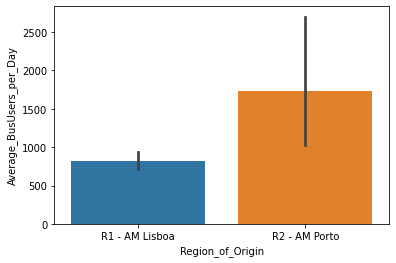

In [ ]:
sns.barplot(x="Region_of_Origin",y="Average_BusUsers_per_Day",data = churn_up)

In [ ]:
# Most of users of public transporation are from Porto, can be correlated with Porto region having higher population overall

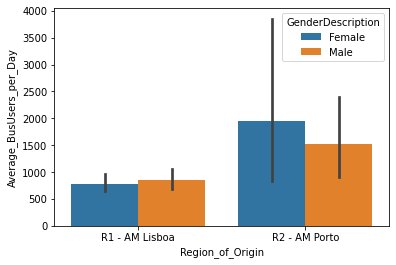

In [ ]:
sns.barplot(x="Region_of_Origin",y="Average_BusUsers_per_Day",data = churn_up,hue='GenderDescription')

In [ ]:
# Porto having more female public transportation than Lisboa is interesting

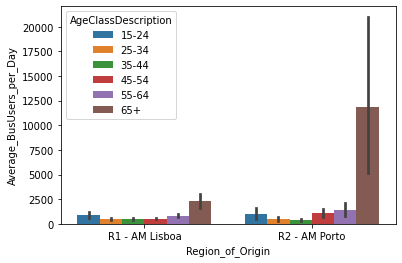

In [ ]:
sns.barplot(x="Region_of_Origin",y="Average_BusUsers_per_Day",data = churn_up,hue='AgeClassDescription')

In [ ]:

# Porto having mostly users from 65+ age group is interesting

In [ ]:
churn_up.groupby(['Region_of_Origin','GenderDescription','AgeClassDescription'])['Average_BusUsers_per_Day'].mean().round()

Region_of_Origin  GenderDescription  AgeClassDescription
R1 - AM Lisboa    Female             15-24                    741.0
                                     25-34                    403.0
                                     35-44                    479.0
                                     45-54                    529.0
                                     55-64                    903.0
                                     65+                     2108.0
                  Male               15-24                   1055.0
                                     25-34                    585.0
                                     35-44                    430.0
                                     45-54                    558.0
                                     55-64                    779.0
                                     65+                     2600.0
R2 - AM Porto     Female             15-24                    486.0
                                     25-34                 

In [ ]:
churn_up.groupby(['Region_of_Origin','District_of_Origin','County_of_Origin'])['Period'].count().round()

Region_of_Origin  District_of_Origin  County_of_Origin    
R1 - AM Lisboa    Lisboa              Amadora                 23
                                      Cascais                 23
                                      Lisboa                  24
                                      Loures                  22
                                      Mafra                   17
                                      Odivelas                21
                                      Oeiras                  23
                                      Sintra                  24
                                      Vila Franca de Xira     22
                  Setúbal             Alcochete                6
                                      Almada                  22
                                      Barreiro                18
                                      Moita                   13
                                      Montijo                 14
                               

In [ ]:
# Women in Porto and 65+ age group, has very higher than usual public transportation uses



# Modelling

In [ ]:
# Pre vs post
churn_up['Period'].unique()

array(['Sep-19 to Feb-20', 'Sep-20 to Jan-21'], dtype=object)

In [ ]:
churn_up['pre_post'] = np.where(churn_up['Period']=='Sep-19 to Feb-20',
                                'pre',
                                'post')

In [ ]:
# Agg at county level
data = churn_up.groupby(['Region_of_Origin','District_of_Origin','County_of_Origin',
                         'GenderDescription','AgeClassDescription','pre_post'])['Average_BusUsers_per_Day'].mean().reset_index()
data

,Region_of_Origin,District_of_Origin,County_of_Origin,GenderDescription,AgeClassDescription,pre_post,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Female,15-24,post,536.005174
1,R1 - AM Lisboa,Lisboa,Amadora,Female,15-24,pre,294.194206
2,R1 - AM Lisboa,Lisboa,Amadora,Female,25-34,post,408.068335
3,R1 - AM Lisboa,Lisboa,Amadora,Female,25-34,pre,1081.652817
4,R1 - AM Lisboa,Lisboa,Amadora,Female,35-44,post,478.337192
...,...,...,...,...,...,...,...
539,R2 - AM Porto,Porto,Vila do Conde,Female,45-54,post,76.844212
540,R2 - AM Porto,Porto,Vila do Conde,Male,25-34,post,13.155082
541,R2 - AM Porto,Porto,Vila do Conde,Male,35-44,post,17.975581
542,R2 - AM Porto,Porto,Vila do Conde,Male,45-54,pre,76.945089


In [ ]:
data_pivot = data.pivot_table(index = ['Region_of_Origin','District_of_Origin','County_of_Origin',
                         'GenderDescription','AgeClassDescription'],
                         columns = 'pre_post',
                         values = 'Average_BusUsers_per_Day').reset_index()
data_pivot['post'] = data_pivot['post'].fillna(0)
data_pivot = data_pivot[data_pivot['pre']>0].copy()
data_pivot['reduction_ratio'] = np.round((data_pivot['pre']-data_pivot['post'])/data_pivot['pre'],2)
data_pivot.sort_values(by = 'reduction_ratio')

pre_post,Region_of_Origin,District_of_Origin,County_of_Origin,GenderDescription,AgeClassDescription,post,pre,reduction_ratio
160,R1 - AM Lisboa,Setúbal,Seixal,Male,15-24,1631.340763,37.697725,-42.27
114,R1 - AM Lisboa,Setúbal,Almada,Male,25-34,497.588139,17.528597,-27.39
69,R1 - AM Lisboa,Lisboa,Oeiras,Female,25-34,447.437221,21.863276,-19.47
297,R2 - AM Porto,Porto,Vila Nova de Gaia,Male,55-64,374.627538,21.943108,-16.07
282,R2 - AM Porto,Porto,Valongo,Male,25-34,366.664832,27.625672,-12.27
...,...,...,...,...,...,...,...,...
245,R2 - AM Porto,Porto,Paredes,Male,25-34,0.000000,274.555628,1.00
51,R1 - AM Lisboa,Lisboa,Mafra,Male,15-24,0.000000,116.974878,1.00
188,R2 - AM Porto,Aveiro,Oliveira de Azeméis,Female,25-34,0.000000,30.498730,1.00
125,R1 - AM Lisboa,Setúbal,Barreiro,Male,25-34,0.000000,250.727837,1.00


In [ ]:
# Reduction ratio is our churn metric, for this problem statement
# churn ratio = reduction ratio = (pre-post)/post
# >0 means churn
# More positive, more churn

In [ ]:
data_pivot.groupby(['GenderDescription'])['reduction_ratio'].mean()

GenderDescription
Female    0.009055
Male     -0.545078
Name: reduction_ratio, dtype: float64

In [ ]:
data_pivot.groupby(['AgeClassDescription'])['reduction_ratio'].mean()

AgeClassDescription
15-24   -1.129697
25-34   -0.757917
35-44    0.126167
45-54    0.329000
55-64   -0.512368
65+      0.018846
Name: reduction_ratio, dtype: float64

In [ ]:
data_pivot.groupby(['GenderDescription','AgeClassDescription'])['reduction_ratio'].mean().round(2)

GenderDescription  AgeClassDescription
Female             15-24                  0.13
                   25-34                 -0.26
                   35-44                  0.17
                   45-54                  0.31
                   55-64                 -0.26
                   65+                   -0.23
Male               15-24                 -2.32
                   25-34                 -1.30
                   35-44                  0.08
                   45-54                  0.35
                   55-64                 -0.70
                   65+                    0.31
Name: reduction_ratio, dtype: float64

In [ ]:
# Male but 65+ age grouping are churning but not the female 65+, is interesting

In [ ]:
data_pivot.groupby(['Region_of_Origin','GenderDescription','AgeClassDescription'])['reduction_ratio'].mean().round(2)

Region_of_Origin  GenderDescription  AgeClassDescription
R1 - AM Lisboa    Female             15-24                  0.20
                                     25-34                 -0.86
                                     35-44                  0.06
                                     45-54                  0.28
                                     55-64                  0.13
                                     65+                   -0.27
                  Male               15-24                 -4.30
                                     25-34                 -1.41
                                     35-44                 -0.04
                                     45-54                  0.29
                                     55-64                  0.00
                                     65+                    0.22
R2 - AM Porto     Female             15-24                 -0.07
                                     25-34                  0.65
                                 

In [ ]:
# In Lisboa, Female 15-24 are churning
# But in Porto, Female 25-34 are churning

# These are specific region insights

Baselline

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#model = RandomForestRegressor(n_estimators = 10, max_depth = 5)
model = DecisionTreeRegressor(max_depth = 5)
model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
data_pivot['GenderDescription_enc'] = np.where(data_pivot['GenderDescription']=='Male',1,0)
data_pivot['AgeClassDescription_enc'] = data['AgeClassDescription'].map({'15-24':1,
                                                                         '25-34':1,
                                                                         '35-44':2,
                                                                         '45-54':2,
                                                                         '55-64':3,
                                                                         '65+':3})
for i in data_pivot['AgeClassDescription'].unique():
  data_pivot[i] = np.where(data_pivot['AgeClassDescription']==i,1,0)
#data_pivot = data_pivot.drop(['65+'],axis = 1)
data_pivot

pre_post,Region_of_Origin,District_of_Origin,County_of_Origin,GenderDescription,AgeClassDescription,post,pre,reduction_ratio,GenderDescription_enc,AgeClassDescription_enc,15-24,25-34,35-44,45-54,55-64,65+
0,R1 - AM Lisboa,Lisboa,Amadora,Female,15-24,536.005174,294.194206,-0.82,0,1,1,0,0,0,0,0
1,R1 - AM Lisboa,Lisboa,Amadora,Female,25-34,408.068335,1081.652817,0.62,0,1,0,1,0,0,0,0
2,R1 - AM Lisboa,Lisboa,Amadora,Female,35-44,478.337192,235.836653,-1.03,0,1,0,0,1,0,0,0
3,R1 - AM Lisboa,Lisboa,Amadora,Female,45-54,571.192813,840.951323,0.32,0,1,0,0,0,1,0,0
4,R1 - AM Lisboa,Lisboa,Amadora,Female,55-64,741.072367,1216.148092,0.39,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,R2 - AM Porto,Porto,Vila Nova de Gaia,Male,45-54,1443.335763,1788.376244,0.19,1,3,0,0,0,1,0,0
297,R2 - AM Porto,Porto,Vila Nova de Gaia,Male,55-64,374.627538,21.943108,-16.07,1,3,0,0,0,0,1,0
298,R2 - AM Porto,Porto,Vila do Conde,Female,25-34,283.342437,335.380123,0.16,0,3,0,1,0,0,0,0
299,R2 - AM Porto,Porto,Vila do Conde,Female,35-44,9.758835,144.469939,0.93,0,1,0,0,1,0,0,0


In [ ]:
y = data_pivot['reduction_ratio']
#X = data_pivot[['GenderDescription_enc','AgeClassDescription_enc']]
X = data_pivot[['GenderDescription_enc','15-24','25-34','35-44','45-54','55-64']]
X.shape,y.shape

((255, 6), (255,))

In [ ]:
model.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = model.predict(X)
len(y_pred)

255

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y, y_pred)

0.037446794440671005

Interpretable Linear Regression

In [ ]:
import statsmodels.api as sm

In [ ]:
X_constant = sm.add_constant(X)
print(len(X_constant))
X_constant.head()

255


,const,GenderDescription_enc,15-24,25-34,35-44,45-54,55-64
0,1.0,0,1,0,0,0,0
1,1.0,0,0,1,0,0,0
2,1.0,0,0,0,1,0,0
3,1.0,0,0,0,0,1,0
4,1.0,0,0,0,0,0,1


In [ ]:
mod = sm.OLS(y,X_constant)
mod

In [ ]:
res = mod.fit()

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        reduction_ratio   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.031
Date:                Sat, 17 Apr 2021   Prob (F-statistic):              0.406
Time:                        11:38:38   Log-Likelihood:                -693.51
No. Observations:                 255   AIC:                             1401.
Df Residuals:                     248   BIC:                             1426.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2660      0.761      0.349      0.727      -1.234       1.766
GenderDescription_enc    -0.5356      0.468     -1.146      0.253      -1.456       0.385
15-24                    -1.1198      0.977     -1.147      0.253      -3.043       0.804
25-34                    -0.7673      0.907     -0.846      0.398      -2.553       1.018
35-44                     0.1190      0.874      0.136      0.892      -1.603       1.841
45-54                     0.3308      0.900      0.367      0.714      -1.443       2.104
55-64                    -0.4683      0.949     -0.493      0.622      -2.338       1.401
==============================================================================
Omnibus:                      397.027   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57804.993
Skew:                          -7.826   Prob(JB):                         0.00
Kurtosis:                      75.080   Cond. No.                         9.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Parameters are not statistically significant on 0.05 level of significance
# But coefficients indicate that 35-54 age group have more tendency to churn, from public transport, than other age groups

In [ ]:
# Interpretation

In [ ]:
# Young college going age-group has lesser income than other age groups so they are less likely to churn from public transportation, 
# as they don't have private cars.
# But their overall volume is also small, as most of them might be living in hostels, or cycling

# Majority to people using public transporation are coming from 65+ age group only
# Old age groups prefer public transportation, as they mostly live alone and probably less regular income.

# Middle age groups having higher and sustainiable running income, might have private cars so churning from public transportation

Actionables


In [ ]:
# We can campaign focussing on 35-54 age group, focused on sustainable and eco-friendly benefits of public transport, 
# not to forget less traffic congestion

**Additional Data Sources and Tableau Visualization Link**

Tableau Link : https://public.tableau.com/profile/b7220#!/vizhome/WDLMap/Dashboard1?publish=yes

Data used for Tableau Visualization : https://drive.google.com/file/d/14oomhon8GKXK_yHwpvOCaKH3IzJncjh2/view?usp=sharing

Data Sources for Latitude and Longitude data:
https://simplemaps.com/data/pt-cities

## Conclusions

### Scalability and Impact


Our suggestion would be extract data about sustainable cities in Portugal and identify if the destinations to which people travel to are sustainable or not, depending on the Demand weights and the number of cities which connect to that particular destination.


Majority to people using public transporation are coming from 65+ age group only


Interpretation

Young college going age-group has lesser income than other age groups so they are less likely to churn from public transportation, 
 as they don't have private cars.
 But their overall volume is also small, as most of them might be living in hostels, or cycling

Majority to people using public transporation are coming from 65+ age group only
 Old age groups prefer public transportation, as they mostly live alone and probably less regular income.

Middle age groups having higher and sustainiable running income, might have private cars so churning from public transportation

Actionables

We can campaign focussing on 35-54 age group, focused on sustainable and eco-friendly benefits of public transport, 
# not to forget less traffic congestion

### Future Work


We will have to use the Automobile production and the GDP data of Portugal to understand how the increase/decrease in GDP or Automobile productions result in more people opting out of Public Transportation